# Star Wars Survey

In [1]:
import pandas as pd
star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')
star_wars.head(10)
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [2]:
yes_no = {'Yes': True, 'No': False}
for col in [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
    ]:
    star_wars[col] = star_wars[col].map(yes_no)
    print(star_wars[col].value_counts(dropna=False))
    

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [3]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [4]:
import numpy as np
star_wars[3:9].head()
for col in range(3, 9):
    print(star_wars.iloc[:, col].value_counts(dropna=False), '\n')
    
print('\n')

map_saw = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}

for col in range(3, 9):
    star_wars.iloc[:, col] = star_wars.iloc[:, col].map(map_saw)
    
for col in range(3, 9):
    print(star_wars.iloc[:, col].value_counts(dropna=False), '\n')

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64 

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64 

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64 

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64 

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64 

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64 



True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64 

False    615


In [6]:
rename_seen = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}
star_wars.rename(columns=rename_seen, inplace=True)
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

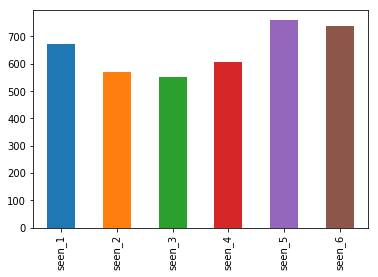

In [33]:
star_wars.iloc[:, 3:9].sum().plot.bar()

# Show Ranking of Each Story

In [29]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
rank_col = {}
rank_list = star_wars.columns[9:15].tolist()
for i in range(0, 6):
    rank_col[rank_list[i]] = 'ranking_' + str(i+1)
star_wars.rename(columns=rank_col, inplace=True)

In the bar chart below, a lower ranking is better.

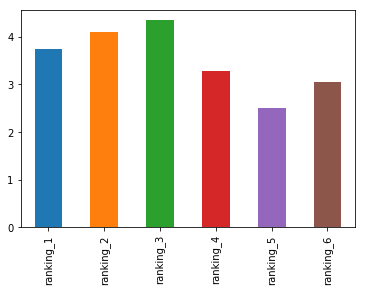

In [28]:
%matplotlib inline
star_wars.iloc[:, 9:15].mean().plot.bar()

# Segmentation

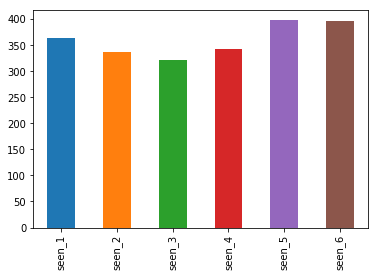

In [46]:
star_wars.columns[32]
star_wars.iloc[:, 32].value_counts()
fan_franchise = star_wars[star_wars.iloc[:, 32]=='Yes']
not_fan_franchise = star_wars[star_wars.iloc[:, 32]=='No']

fan_franchise.iloc[:, 3:9].sum().plot.bar()

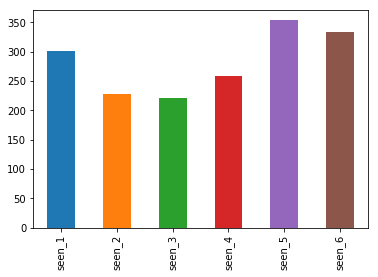

In [48]:
not_fan_franchise.iloc[:, 3:9].sum().plot.bar()

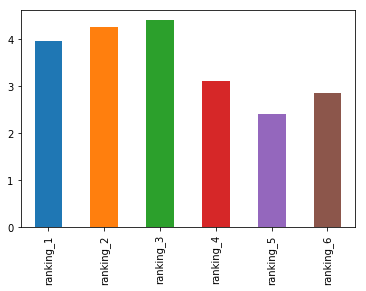

In [50]:
fan_franchise.iloc[:, 9:15].mean().plot.bar()

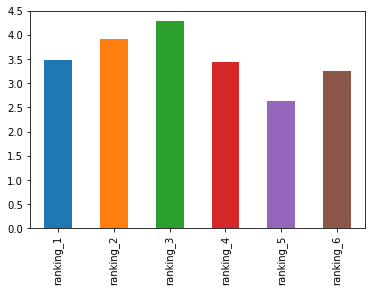

In [51]:
not_fan_franchise.iloc[:, 9:15].mean().plot.bar()

### Gender Segmentation

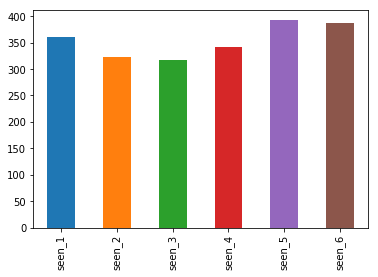

In [54]:
star_wars['Gender'].value_counts()
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

males.iloc[:, 3:9].sum().plot.bar()

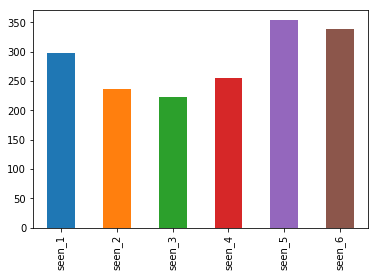

In [55]:
females.iloc[:, 3:9].sum().plot.bar()

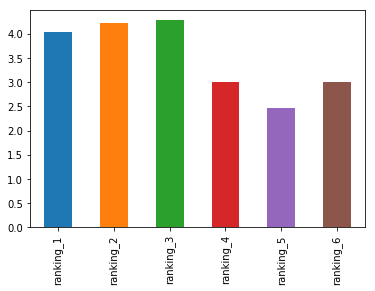

In [57]:
males.iloc[:, 9:15].mean().plot.bar()

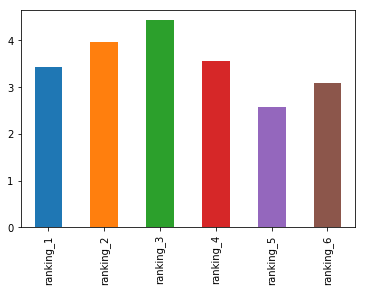

In [58]:
females.iloc[:, 9:15].mean().plot.bar()

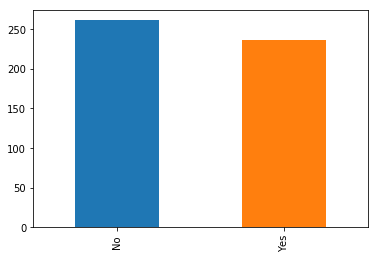

In [61]:
males.iloc[:, 32].value_counts().plot.bar()

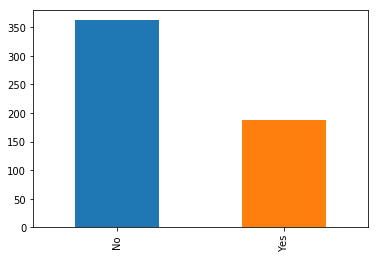

In [62]:
females.iloc[:, 32].value_counts().plot.bar()